In [1]:
import TO_sim.Q_simul as QSIM
# import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
from scipy.integrate import quad
from scipy import interpolate

In [316]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [3]:
import sympy

In [14]:
omega,K,r,m = sympy.symbols('Omega K r m',real=True)

In [36]:
a = 1/sympy.sqrt(K*r*m)
b = omega/(K*r)

In [37]:
M_eR = 1/2*(-1)*(a**2/(a**4+b**2))
M_eI = 1/2*(a**2/b)*(a**2/(a**4+b**2))

In [38]:
M_eR.simplify()

-0.5*K*m*r/(Omega**2*m**2 + 1)

In [35]:
M_eI.simplify()


0.25*K*r/(4*Omega**3*m**2 + Omega)

In [21]:
IM

0.25*K*r*re(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))*re((K*m*r)**(-1.0))/Omega + (-0.25*K*r*im((K*m*r)**(-1.0))/Omega - 0.5)*im(1/((K*m*r)**1.0*((K*m*r)**(-2.0) + 4*Omega**2/(K**2*r**2))))

In [42]:
(a**-3 *K*r).simplify()

K*r*(K*m*r)**(3/2)

## cluste의 속도를 정하는 것

In [339]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [351]:
N = 2000
K = 8
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=False,seed=10)
sol = Qsimul.solve()

In [352]:
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()

In [353]:
t_mean = r_clu_info['t_mean']
r0 = r_clu_info['r_clu_mean']['0'][-1]
rp = r_clu_info['r_clu_mean']['+'][-1]
rm = r_clu_info['r_clu_mean']['-'][-1]

KeyError: '+'

In [354]:
_,rptA,_,rpA,_,_ = OSP2.get_r_sec_np(K,m,F_RMu,samples=30)

In [355]:
K_ = np.linspace(0,15,1000)
I_FR0u = interpolate.interp1d(F_R0u(K_),K_)
K_match = I_FR0u(r0)
O_O = 4/np.pi * np.sqrt(F_RMu(K_match)*K_match/m) - 0.3056*1/np.sqrt(K_match*F_RMu(K_match)*m**3)
shift_O = OSP2.get_shift_O(r0,rp,O_O,K,m)
O_p2 = 4/np.pi * np.sqrt(rp*K/m) - 0.3056*1/np.sqrt(K*rp*m**3)

In [356]:
t = r_clu_info['t']

In [357]:
rpA

array([0.05710004])

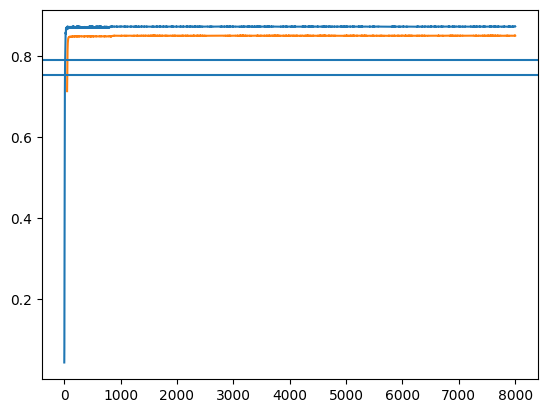

In [358]:
plt.plot(t,r_clu_info['r_clu']['0'])
plt.plot(t_mean,r_clu_info['r_total_mean'])
plt.axhline(F_R0u(K))
plt.axhline(F_RMu(K))

(7900.0, 8000.0)

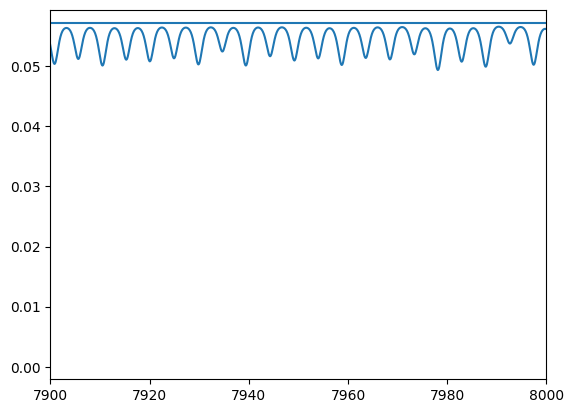

In [347]:
plt.plot(t,r_clu_info['r_clu']['+'])
plt.axhline(rpA)
plt.xlim(7900,8000)

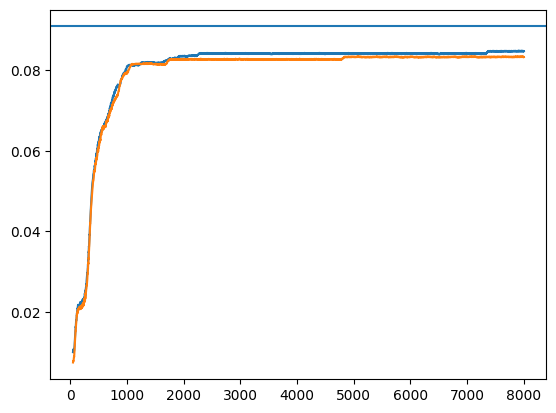

In [203]:
plt.plot(t_mean,r_clu_info['r_clu_mean']['+'])
plt.plot(t_mean,r_clu_info['r_clu_mean']['-'])
plt.axhline(rpA)
# plt.plot(t,r_clu_info['r_clu_mean']['0'])

In [422]:
O_O

0.8184039023543687

In [423]:
omega = Qsimul.omega
shift_O = OSP2.get_shift_O(r0,rpA,O_O,K,m)
F_S,F_OR = OSP2.get_shift(O_O)

In [424]:
F_S(O_p2) + O_O

1.1245114751338705

In [425]:
F_OR(omega[-1]-shift_O) 

array([1.36996161])

In [426]:
TEMP = F_S(O_p2)

In [427]:
O_C = O_O + shift_O
A = O_C*(1- 0.5 * (K*r0)**2/(O_C**2+m**2*O_C**4))

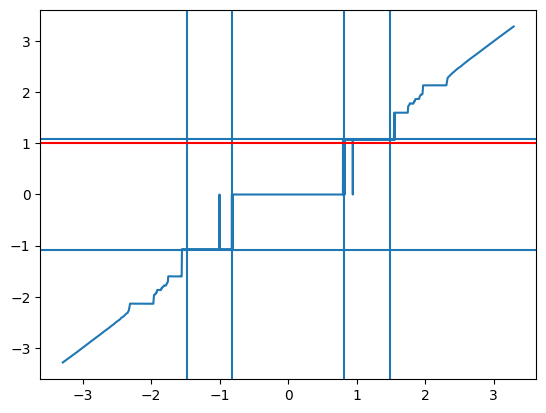

In [428]:
plt.plot(omega,cluster_info['avg_dtheta_last'])
plt.axvline(O_O)
plt.axhline(O_O+shift_O)
plt.axvline(O_O+shift_O+O_p2)
plt.axvline(-O_O)
plt.axvline(-(O_O+O_p2+shift_O))
plt.axhline(-(O_O+shift_O))
plt.axhline(A,color ='red')


## K_M space re

In [2]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import imp
imp.reload(PU);

In [4]:
# seed,N,K,m_span,t_end,start_p
args = 0,10,500,(0.0,0.1,0.1),220,True
data = PU.KM_space_ms(*args)

In [5]:
df = pd.DataFrame(columns=data.keys())

In [6]:
df.keys()

Index(['Ks', 'r0', 'rM', 'r+', 'r+_total', 'r-', 'r-_total', 'S0', 'S+', 'S-',
       'V0', 'V+', 'V-', 'sig', 'sig_+total', 'sig_-total'],
      dtype='object')

In [5]:
ms = np.arange(0,10+0.1/2,0.1)

In [22]:
N = 1000
K = 5
K_span = (0,10,0.1)
t_end = 8000
core = 8

In [23]:
index_ = 0
m_set = [] 
for i in range(len(ms)//core +1):
    m_set.append(ms[index_:index_+core])
    index_ += core
num = 1

In [24]:
for j,m_s in enumerate(m_set):
    df = pd.DataFrame(columns=data.keys())
    for i,data in enumerate(parmap.map(PU.KM_space_ms,m_s,seed=10,N=N,K_span =K_span,t_end=t_end,start_p=True,pm_pbar=True, pm_processes=core)):
        df.loc[i] = data
    Ks = df['Ks'][0]
    S0 = np.array([*df['S0'].to_numpy()]).T
    SP = np.array([*df['S+'].to_numpy()]).T
    SM = np.array([*df['S-'].to_numpy()]).T

    R0 = np.array([*df['r0'].to_numpy()]).T
    RM0 = np.array([*df['rM'].to_numpy()]).T
    RP = np.array([*df['r+'].to_numpy()]).T
    RPT = np.array([*df['r+_total'].to_numpy()]).T
    RM = np.array([*df['r-'].to_numpy()]).T
    RMT = np.array([*df['r-_total'].to_numpy()]).T

    V0 = np.array([*df['V0'].to_numpy()]).T
    VP = np.array([*df['V+'].to_numpy()]).T
    VM = np.array([*df['V-'].to_numpy()]).T

    SIG = np.array([*df['sig'].to_numpy()]).T
    SIGP = np.array([*df['sig_+total'].to_numpy()]).T
    SIGM = np.array([*df['sig_-total'].to_numpy()]).T
    np.savez(f'./Ensembles/KM space/N = {N} {j}',Ks=Ks,ms=m_set,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import TO_sim.analytical.order_sec_parameter as OSP

In [8]:
N = 5000

In [9]:
temp = glob.glob(rf'./Ensembles/KM space/N = {N} *.npz')

In [12]:
temp = []
for i in np.arange(0,4):
    temp.append(rf'./Ensembles/KM space/N = {N} {i}.npz')

In [13]:
A['S0'].shape

NameError: name 'A' is not defined

In [21]:
ms = np.arange(0,10.05,0.1)
Ks = np.arange(0,10.05,0.1)

In [15]:
A = np.load(temp[0],allow_pickle=True)
KEY = [*A.keys()][2:]
T = {}
for key in KEY:
    for f in temp[1:2]:
        B =  np.load(f,allow_pickle=True)
        temp_ = np.concatenate([A[key],B[key]],axis=1)
        T[key] = temp_
            
    for f in temp[2:]:
        B =  np.load(f,allow_pickle=True)
        T[key] = np.concatenate([T[key],B[key]],axis=1)

In [16]:
KEY

['S0',
 'SP',
 'SM',
 'R0',
 'RM0',
 'RP',
 'RPT',
 'RM',
 'RMT',
 'SIG',
 'V0',
 'VP',
 'VM',
 'SIGP',
 'SIGM']

In [17]:
df_new = pd.DataFrame(columns=['S0','S+','S-','rm','r0','r+','r-','r+_total','r-_total','sig','sig+_total','sig-_total','v0','v+','v-','K','m'])
df_new = df_new.set_index(['K','m'])


In [18]:
MAP = {'S0':'S0','S+':'SP','S-':'SM','rm':'RM0','r0':'R0','r+':'RP','r-':'RM','r+_total':'RPT','r-_total':'RMT','sig':'SIG','sig+_total':'SIGP','sig-_total':'SIGM','v0':'V0','v+':'VP','v-':'VM'}

In [19]:
df_KEY = ['S0', 'S+', 'S-', 'rm', 'r0', 'r+', 'r-', 'r+_total', 'r-_total', 'sig',
       'sig+_total', 'sig-_total', 'v0', 'v+', 'v-']

In [22]:
for key in df_KEY:
    for i,K in enumerate(Ks):
        for j,m in enumerate(ms):
            df_new.loc[(K,m),key] = T[MAP[key]][i][j]

In [23]:
df_new.sort_index().to_excel(f'N = {N} seed = 10 QNORMAL wo pv.xlsm')

In [ ]:
S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM  = T

In [ ]:
np.savez(f'./Ensembles/N = {N} K = {K}',ms=ms,S0=S0,SP=SP,SM=SM,R0=R0,RM0=RM0,RP=RP,RPT=RPT,RM=RM,RMT=RMT,SIG=SIG,V0=V0,VP=VP,VM=VM,SIGP=SIGP,SIGM=SIGM)


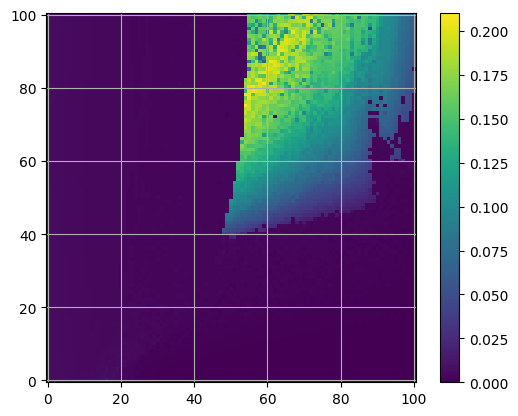

In [24]:
plt.imshow(df_new['sig'].unstack().to_numpy(float).T,origin='lower')
plt.colorbar()
plt.grid()

In [25]:
df_A = pd.read_excel(f'NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_A2 = pd.read_excel('Order parameter and secondary cluster with rsecd.xlsm',index_col=[0,1])
# df_A2 = pd.read_excel('Order parameter and secondary cluster wo rsecd.xlsm',index_col=[0,1])


(0.0, 10.0)

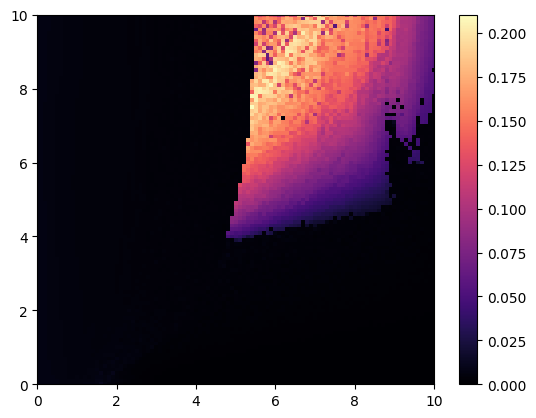

In [26]:
KK = df_new.index.to_frame().K.unstack().to_numpy().T
MM = df_new.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df_new['sig'].unstack().to_numpy(float).T,cmap='magma')
plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)

In [27]:
df_A

rM_u      rM_d      r0_u      r0_d      rd_u      rd_d  \
K    m                                                                  
0.0  0.0        NaN       NaN       NaN       NaN       NaN       NaN   
     0.1        NaN       NaN       NaN       NaN       NaN       NaN   
     0.2        NaN       NaN       NaN       NaN       NaN       NaN   
     0.3        NaN       NaN       NaN       NaN       NaN       NaN   
     0.4        NaN       NaN       NaN       NaN       NaN       NaN   
...             ...       ...       ...       ...       ...       ...   
10.0 9.6   0.652310  0.001509  0.701609  0.008940  0.049299  0.007430   
     9.7   0.647663  0.001509  0.697401  0.008930  0.049738  0.007421   
     9.8   0.643046  0.001507  0.693214  0.008917  0.050168  0.007410   
     9.9   0.638467  0.001505  0.689056  0.008902  0.050589  0.007396   
     10.0  0.633914  0.001503  0.684914  0.008885  0.051001  0.007382   

              r+_ul  r+_drift        mu  r+_total_u  r+_total_d  r+_total_ul  \
K    m                                                                         
0.0  0.0        NaN       NaN       NaN         NaN         NaN          NaN   
     0.1        NaN       NaN       NaN         NaN         NaN          NaN   
     0.2        NaN       NaN       NaN         NaN         NaN          NaN   
     0.3        NaN       NaN       NaN         NaN         NaN          NaN   
     0.4        NaN       NaN       NaN         NaN         NaN          NaN   
...             ...       ...       ...         ...         ...          ...   
10.0 9.6   0.109917  0.024649 -0.084670    0.109917         NaN          NaN   
     9.7   0.111944  0.024869 -0.080451    0.111944         NaN          NaN   
     9.8   0.113953  0.025084 -0.076216    0.113953         NaN          NaN   
     9.9   0.115971  0.025294 -0.071894    0.115971         NaN          NaN   
     10.0  0.117957  0.025500 -0.067603    0.117957         NaN          NaN   

           r+_total_ud  
K    m                  
0.0  0.0           NaN  
     0.1           NaN  
     0.2           NaN  
     0.3           NaN  
     0.4           NaN  
...                ...  
10.0 9.6           NaN  
     9.7           NaN  
     9.8           NaN  
     9.9           NaN  
     10.0          NaN  

[10201 rows x 13 columns]

In [28]:
KKA = df_A.index.to_frame().K.unstack().to_numpy().T
MMA = df_A.index.to_frame().m.unstack().to_numpy().T

KKA2 = df_A2.index.to_frame().K.unstack().to_numpy().T
MMA2 = df_A2.index.to_frame().m.unstack().to_numpy().T
r_ul = df_A['r+_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_0 = df_A['r0_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T

r_ul2 = df_A2['r_sec_ul'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
r_02 = df_A2['r_main_u'].apply(lambda x: np.where(x>=0.000,x,np.nan)).unstack().to_numpy(float).T
RSTD = OSP.get_rstd(r_0,r_ul,KKA,MMA)


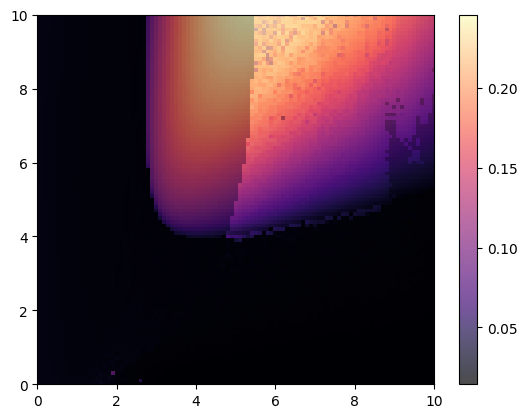

In [29]:
plt.pcolormesh(KK,MM,df_new['sig'].unstack().to_numpy(float).T,cmap='magma')
plt.pcolormesh(KKA,MMA,RSTD,cmap='magma',alpha=0.7)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [30]:
RP = df_new['r+'].unstack().to_numpy(float).T
R0 = df_new['r0'].unstack().to_numpy(float).T
RM = df_new['rm'].unstack().to_numpy(float).T
RPA = df_A['r+_ul'].unstack().to_numpy(float).T[:101,:101]
R0A = df_A['r0_u'].unstack().to_numpy(float).T[:101,:101]
RMA = df_A['rM_u'].unstack().to_numpy(float).T[:101,:101]

RPA2 = df_A2['r_sec_u'].unstack().to_numpy(float).T
R0A2 = df_A2['r_main_u'].unstack().to_numpy(float).T

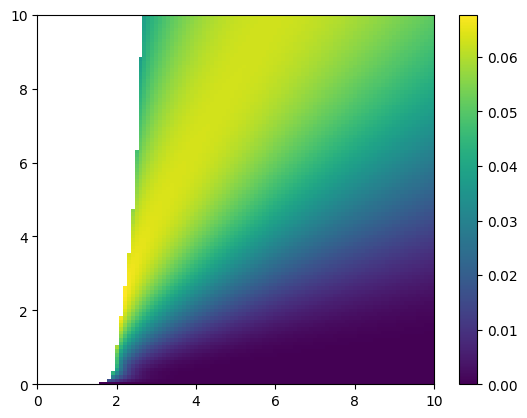

In [31]:
plt.pcolormesh(KK,MM,abs(RMA-R0A))

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [37]:
OPM = OSP2.get_OPM(RMA,KK,MM)
Rp = KK*RPA**2/(OPM*(1+m**2*OPM**2))

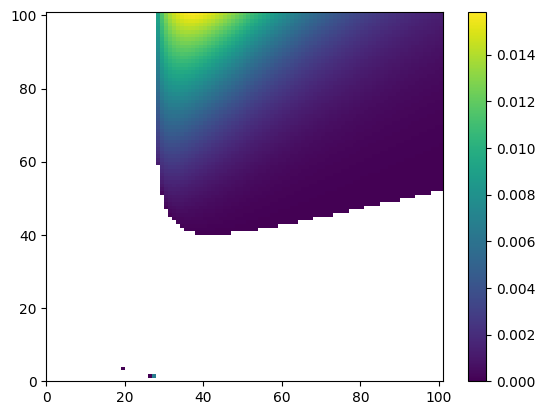

In [33]:
plt.pcolormesh(Rp,vmin=0)
plt.colorbar()

In [41]:
np.nansum(np.dstack((RMA,Rp)),axis=2)

array([[0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       [0.        , 0.        , 0.        , ..., 0.99469545, 0.99480419,
        0.99490943],
       ...,
       [0.        , 0.        , 0.        , ..., 0.6348769 , 0.63958578,
        0.64423167],
       [0.        , 0.        , 0.        , ..., 0.63034163, 0.6350624 ,
        0.63972731],
       [0.        , 0.        , 0.        , ..., 0.6258467 , 0.630583  ,
        0.63525152]])

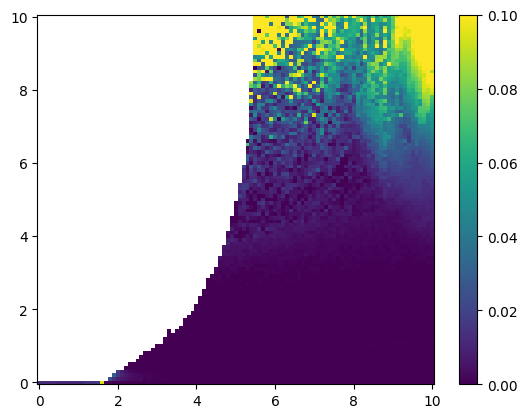

In [34]:
plt.pcolormesh(KK,MM,(np.where(~np.isnan(R0),RM,np.nan) - np.nansum(np.dstack((RMA,Rp)),axis=2)),vmax=0.1,vmin=0)
plt.colorbar()

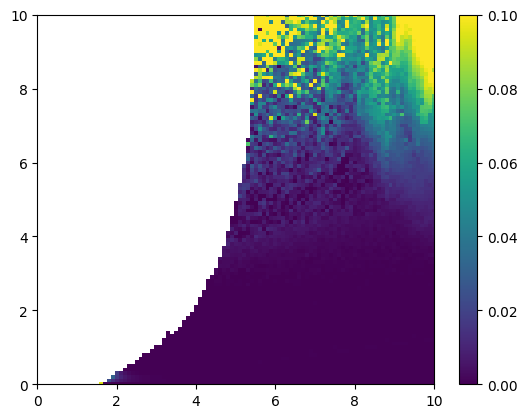

In [38]:
plt.pcolormesh(KK,MM,(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.1,vmin=0)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

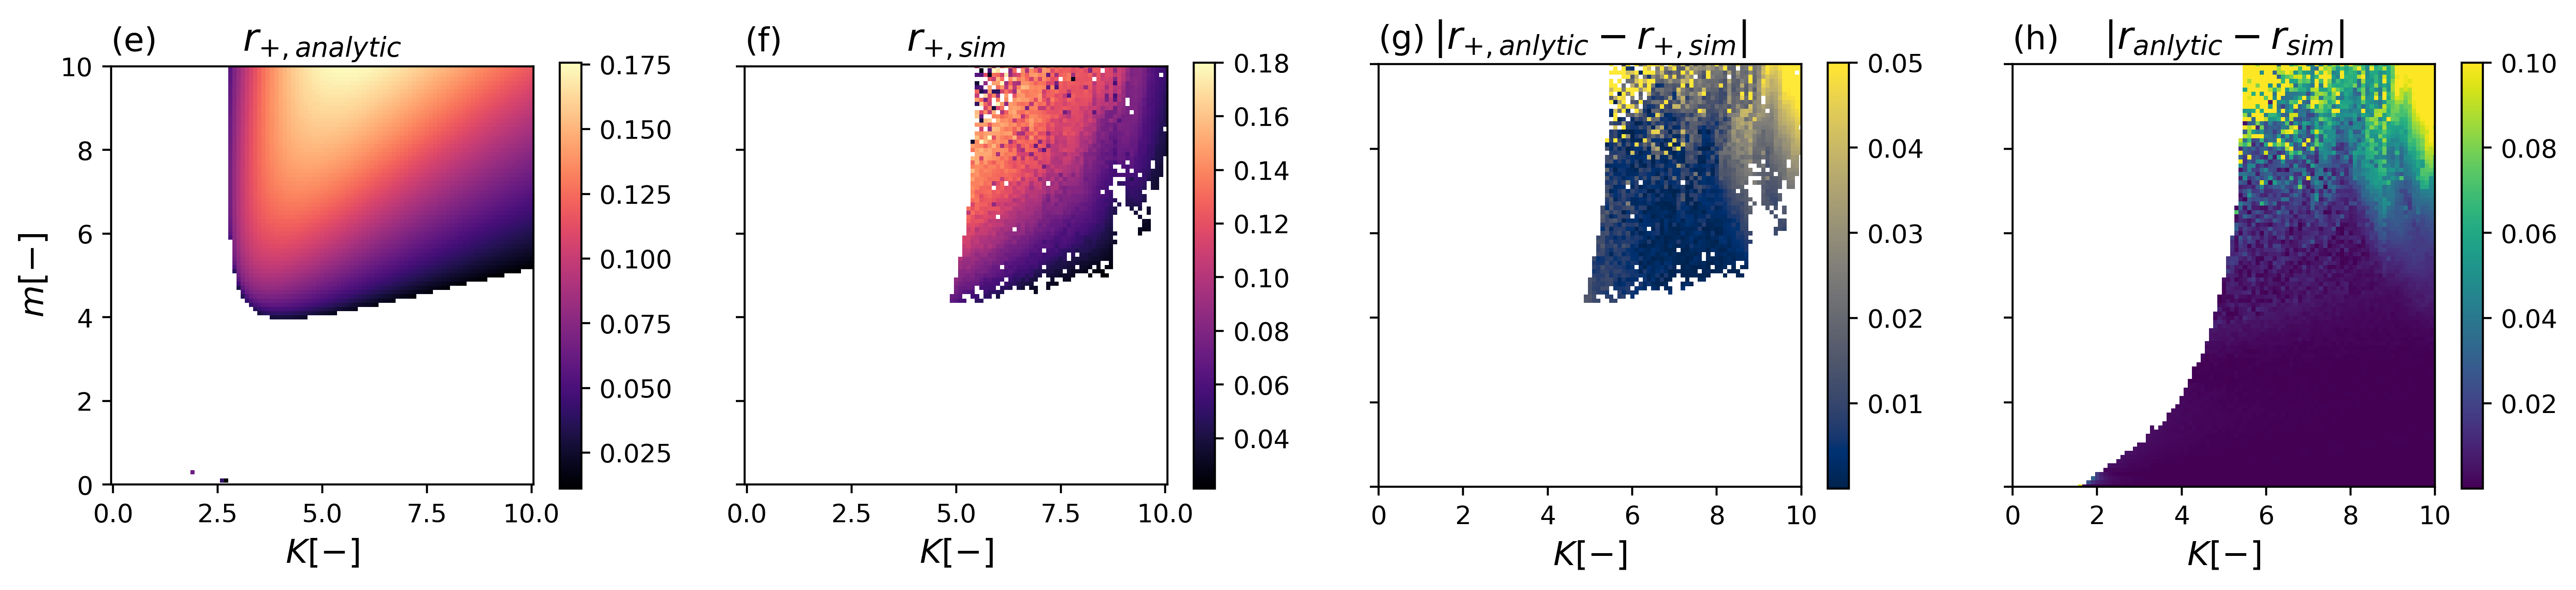

In [36]:
P = RP - RPA[:101,:101]
fig,axs = plt.subplots(1,4,figsize=(17,4),sharey=True,dpi=400)
plt.sca(axs[0])
plt.pcolormesh(KK,MM,RPA,cmap='magma')
plt.colorbar(shrink=0.75)
plt.ylabel(r'$m[-]$',fontsize=13)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,analytic}$',fontsize=15)
plt.gca().set_aspect('equal')
plt.title('(e)',fontsize=13,loc='left')

plt.sca(axs[1])
plt.pcolormesh(KK,MM,RP,vmax=0.18,cmap='magma')
plt.gca().set_aspect('equal')
plt.colorbar(shrink=0.75)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.title(r'$r_{+,sim}$',fontsize=15)
plt.title('(f)',fontsize=13,loc='left')

plt.sca(axs[2])
plt.pcolormesh(KK,MM,abs(P),vmax=0.05,cmap='cividis')
plt.xlim(0,10)
plt.ylim(0,10)

plt.title('(g)',fontsize=13,loc='left')

plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title(r'$\left|r_{+,anlytic} - r_{+,sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

plt.sca(axs[3])
plt.pcolormesh(KK,MM,abs(np.where(~np.isnan(R0),RM,np.nan) - RMA[:101,:101]),vmax=0.1)

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K[-]$',fontsize=13)
plt.colorbar(shrink=0.75)
plt.title('(h)',fontsize=13,loc='left')
plt.title(r'$\left|r_{anlytic} - r_{sim}\right|$',fontsize=15)
plt.gca().set_aspect('equal')

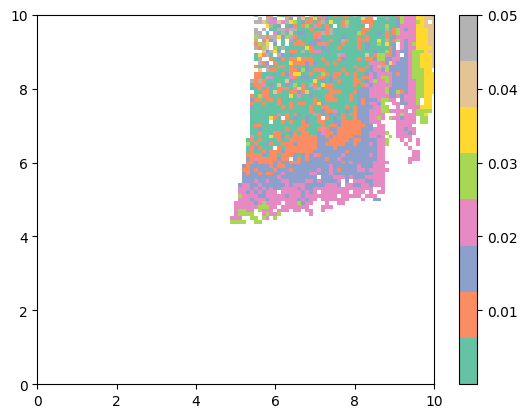

In [57]:
plt.pcolormesh(KKA2,MMA2,abs(RP[1:,1:] - RPA2),vmax=0.05,cmap='Set2')
# plt.pcolormesh(KKA,MMA,abs(RP - RPA[:101,:101]),vmax=0.05,cmap='Set2')

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [155]:
RSTD_ = df_new['sig'].unstack().to_numpy(float).T


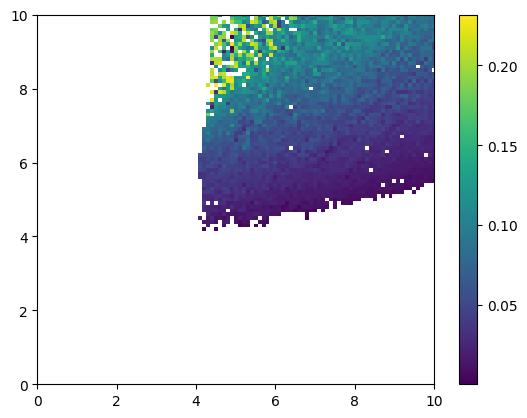

In [156]:
plt.pcolormesh(KK,MM,abs(RP - RSTD[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

In [ ]:
plt.pcolormesh(KK,MM,abs(RP - RPA[:101,:101]),)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

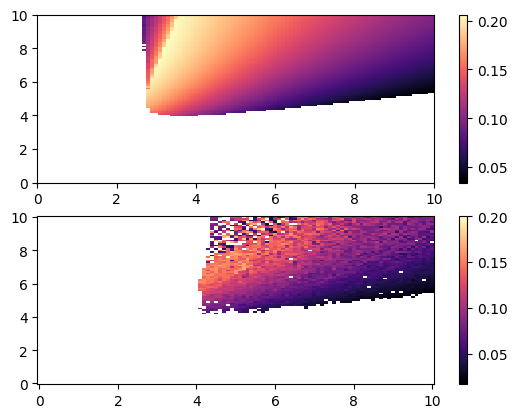

In [132]:
plt.subplot(212)

plt.pcolormesh(KK,MM,df_new['r+'].unstack().to_numpy(float).T,cmap='magma',vmax=0.2)
plt.colorbar()
plt.subplot(211)
plt.pcolormesh(KKA,MMA,df_A['r_sec_ul'].unstack().to_numpy(float).T,cmap='magma',alpha=1)

plt.xlim(0,10)
plt.ylim(0,10)
plt.colorbar()

## $K_C$

In [221]:
m = 4.04
F_RMd4,F_RMu4,F_R0d4,F_R0u4 =  OSP2.Make_R_function(m)
r_d = lambda x: (F_R0u4(x)-F_RMu4(x))/2

# Ks_check2 = np.arange(4.36,4.38,0.001)
Ks_check2 = np.arange(4.98,5.01,0.01)
rs_d_NEW,rs_u_NEW,rs_dFl_NEW,rs_uFl_NEW,md,mu = OSP2.get_r_sec_np(Ks_check2,m,F_RMu4,samples=150)

[4.98 4.99]


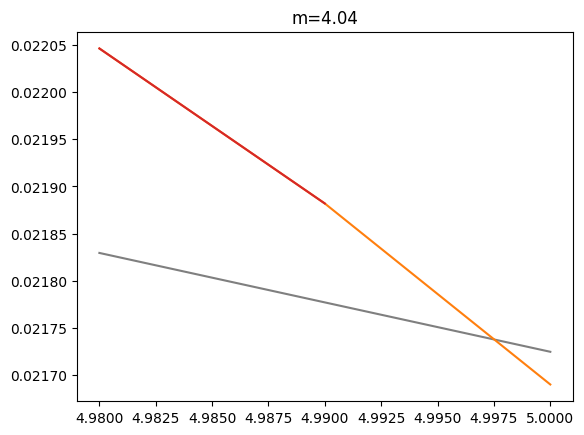

In [222]:
r_d = lambda x: (F_R0u4(x)-F_RMu4(x))/2

indexs, = np.where(r_d(Ks_check2)<=rs_uFl_NEW)
print(Ks_check2[indexs])
plt.plot(Ks_check2,rs_dFl_NEW,color='tab:orange')
plt.plot(Ks_check2,rs_uFl_NEW,color='tab:orange')
plt.plot(Ks_check2[indexs],rs_dFl_NEW[indexs],color='tab:red')
plt.plot(Ks_check2[indexs],rs_uFl_NEW[indexs],color='tab:red')
plt.title(f'm={m}')
# plt.plot(K_,(F_R0u4(K_)-F_RMu4(K_))/2,color='tab:grey',zorder=0)
plt.plot(Ks_check2,(F_R0u4(Ks_check2)-F_RMu4(Ks_check2))/2,color='tab:grey',zorder=0)

## R m

In [ ]:
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [290]:
r_m = {}

In [305]:
m = 4.4
N = 1000
K = 5
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=True,seed=10)
sol = Qsimul.solve()
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()
t_mean = r_clu_info['t_mean']
t = sol['t']
rs = sol['rs']
# r0 = r_clu_info['r_clu_mean']['0'][-1]
# rp = r_clu_info['r_clu_mean']['+'][-1]
# rm = r_clu_info['r_clu_mean']['-'][-1]

In [306]:
r_m[m] = rs[-400:]

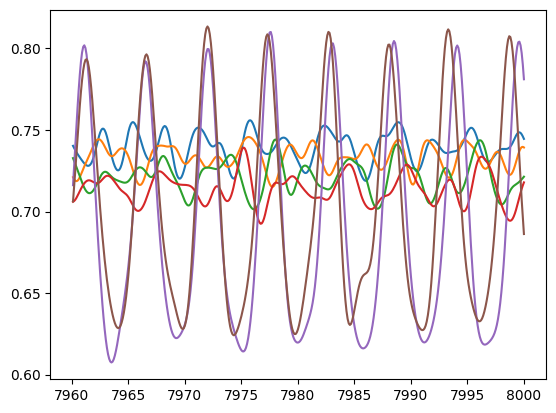

In [310]:
for m,rs in r_m.items():
    plt.plot(t[-400:],rs)


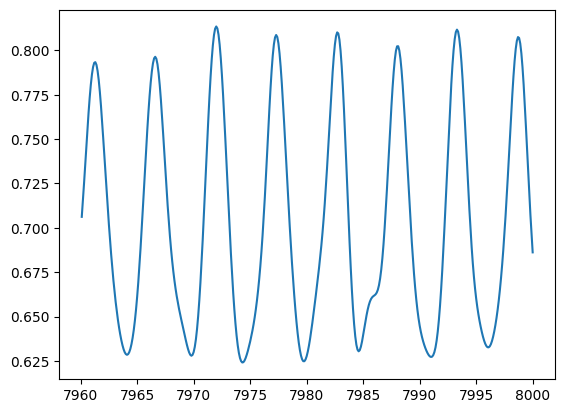

In [307]:
plt.plot(t[-400:],rs[-400:])